In [1]:
import os
os.chdir("/data/adv_geom/src/")
import numpy as np
import torch

import matplotlib.pyplot as plt

In [2]:
from datagen.synthetic.multiple.concentricspheres import ConcentricSpheres

In [3]:
config = {
    "k": 2,
    "n": 2,
    "g": 0.3,
    "max_norm": 0.1,
    "D": 0.07,
    "inferred": True,
    "N": 20000,
    "num_neg": 10000,
    "r": 1.0,
    "augment": False,
    "off_online": False,
    "online": False,
    "cache_dir": "./tmp",
    "recomp_tn": False,
    "use_new_knn": False,
    "gamma": 0,
    "norm_factor": 1,
    "M": 1.0
    
}

In [4]:
test_spheres = ConcentricSpheres(**config)

In [5]:
test_spheres.compute_points()

02-05-2022 21:00:02 -- [I] root >> [RandomSphere]: generated centre
02-05-2022 21:00:02 -- [I] root >> [RandomSphere]: generated points in k-dim
02-05-2022 21:00:02 -- [I] root >> [ConcentricSpheres]: Generated S1
02-05-2022 21:00:02 -- [I] root >> [RandomSphere]: generated centre
02-05-2022 21:00:02 -- [I] root >> [RandomSphere]: generated points in k-dim
02-05-2022 21:00:02 -- [I] root >> [ConcentricSpheres]: Generated S2
  0%|          | 0/1 [00:00<?, ?it/s]

0 0 1823 0 0
1 1 1104 1 0
2 2 1041 2 0
3 3 707 3 0
4 4 1383 4 0
5 5 1891 5 0
6 6 1302 6 0
7 7 3021 7 0
8 8 676 8 0
9 9 2564 9 0
10 10 3322 10 0
11 11 4757 11 0
12 12 1563 12 0
13 13 1260 13 0
14 14 3203 14 0
15 15 2353 15 0
16 16 357 16 0
17 17 3234 17 0
18 18 418 18 0
19 19 4737 19 0
20 20 3955 20 0
21 21 1593 21 0
22 22 4602 22 0
23 23 1385 23 0
24 24 4407 24 0
25 25 2751 25 0
26 26 244 26 0
27 27 4572 27 0
28 28 614 28 0
29 29 249 29 0
30 30 3093 30 0
31 31 1595 31 0
32 32 1929 32 0
33 33 510 33 0
34 34 3967 34 0
35 35 4869 35 0
36 36 1365 36 0
37 37 923 37 0
38 38 73 38 0
39 39 808 39 0
40 40 2878 40 0
41 41 2267 41 0
42 42 2126 42 0
43 43 4330 43 0
44 44 2204 44 0
45 45 3679 45 0
46 46 4737 46 0
47 47 4716 47 0
48 48 3658 48 0
49 49 984 49 0
50 50 1298 50 0
51 51 3744 51 0
52 52 3280 52 0
53 53 3955 53 0
54 54 2653 54 0
55 55 3687 55 0
56 56 2962 56 0
57 57 2946 57 0
58 58 3045 58 0
59 59 859 59 0
60 60 2085 60 0
61 61 2727 61 0
62 62 376 62 0
63 63 4471 63 0
64 64 4690 64 0
65 65

608 608 158 608 0
609 609 1837 609 0
610 610 4611 610 0
611 611 1025 611 0
612 612 658 612 0
613 613 677 613 0
614 614 4410 614 0
615 615 4046 615 0
616 616 3821 616 0
617 617 2375 617 0
618 618 275 618 0
619 619 4547 619 0
620 620 1588 620 0
621 621 4581 621 0
622 622 4662 622 0
623 623 245 623 0
624 624 888 624 0
625 625 2211 625 0
626 626 4025 626 0
627 627 0 627 0
628 628 2910 628 0
629 629 2184 629 0
630 630 4246 630 0
631 631 3251 631 0
632 632 3051 632 0
633 633 1510 633 0
634 634 3771 634 0
635 635 1128 635 0
636 636 697 636 0
637 637 1088 637 0
638 638 2419 638 0
639 639 2628 639 0
640 640 3789 640 0
641 641 685 641 0
642 642 2756 642 0
643 643 1842 643 0
644 644 1732 644 0
645 645 4835 645 0
646 646 4366 646 0
647 647 1972 647 0
648 648 710 648 0
649 649 324 649 0
650 650 4893 650 0
651 651 2967 651 0
652 652 3799 652 0
653 653 2594 653 0
654 654 1092 654 0
655 655 2955 655 0
656 656 211 656 0
657 657 1581 657 0
658 658 3831 658 0
659 659 1443 659 0
660 660 4143 660 0
661 661

1290 1290 2924 1290 0
1291 1291 3693 1291 0
1292 1292 2270 1292 0
1293 1293 3457 1293 0
1294 1294 2949 1294 0
1295 1295 2318 1295 0
1296 1296 3385 1296 0
1297 1297 2294 1297 0
1298 1298 2995 1298 0
1299 1299 3638 1299 0
1300 1300 4916 1300 0
1301 1301 3367 1301 0
1302 1302 3284 1302 0
1303 1303 2342 1303 0
1304 1304 170 1304 0
1305 1305 4341 1305 0
1306 1306 1639 1306 0
1307 1307 616 1307 0
1308 1308 239 1308 0
1309 1309 4493 1309 0
1310 1310 1856 1310 0
1311 1311 922 1311 0
1312 1312 4887 1312 0
1313 1313 1904 1313 0
1314 1314 3149 1314 0
1315 1315 812 1315 0
1316 1316 4999 1316 0
1317 1317 1730 1317 0
1318 1318 831 1318 0
1319 1319 3424 1319 0
1320 1320 2207 1320 0
1321 1321 4839 1321 0
1322 1322 3432 1322 0
1323 1323 4908 1323 0
1324 1324 3368 1324 0
1325 1325 2227 1325 0
1326 1326 2260 1326 0
1327 1327 4625 1327 0
1328 1328 2917 1328 0
1329 1329 3520 1329 0
1330 1330 4380 1330 0
1331 1331 2708 1331 0
1332 1332 1820 1332 0
1333 1333 648 1333 0
1334 1334 188 1334 0
1335 1335 1222 133

1969 1969 836 1969 0
1970 1970 2157 1970 0
1971 1971 1576 1971 0
1972 1972 305 1972 0
1973 1973 2053 1973 0
1974 1974 2890 1974 0
1975 1975 3344 1975 0
1976 1976 4456 1976 0
1977 1977 1208 1977 0
1978 1978 1858 1978 0
1979 1979 2703 1979 0
1980 1980 1971 1980 0
1981 1981 1113 1981 0
1982 1982 983 1982 0
1983 1983 3310 1983 0
1984 1984 4001 1984 0
1985 1985 2771 1985 0
1986 1986 3152 1986 0
1987 1987 2162 1987 0
1988 1988 2127 1988 0
1989 1989 3639 1989 0
1990 1990 4274 1990 0
1991 1991 560 1991 0
1992 1992 1809 1992 0
1993 1993 4387 1993 0
1994 1994 2932 1994 0
1995 1995 290 1995 0
1996 1996 4637 1996 0
1997 1997 1909 1997 0
1998 1998 4689 1998 0
1999 1999 1428 1999 0
2000 2000 947 2000 0
2001 2001 2527 2001 0
2002 2002 1348 2002 0
2003 2003 380 2003 0
2004 2004 1704 2004 0
2005 2005 309 2005 0
2006 2006 3414 2006 0
2007 2007 1498 2007 0
2008 2008 2894 2008 0
2009 2009 660 2009 0
2010 2010 3447 2010 0
2011 2011 2273 2011 0
2012 2012 1497 2012 0
2013 2013 2072 2013 0
2014 2014 3436 2014

2662 2662 4148 2662 0
2663 2663 1087 2663 0
2664 2664 1142 2664 0
2665 2665 4381 2665 0
2666 2666 2065 2666 0
2667 2667 3908 2667 0
2668 2668 4255 2668 0
2669 2669 3959 2669 0
2670 2670 141 2670 0
2671 2671 396 2671 0
2672 2672 2627 2672 0
2673 2673 4629 2673 0
2674 2674 1555 2674 0
2675 2675 2508 2675 0
2676 2676 4381 2676 0
2677 2677 1028 2677 0
2678 2678 2176 2678 0
2679 2679 670 2679 0
2680 2680 4594 2680 0
2681 2681 1855 2681 0
2682 2682 3429 2682 0
2683 2683 2078 2683 0
2684 2684 2006 2684 0
2685 2685 1688 2685 0
2686 2686 4431 2686 0
2687 2687 569 2687 0
2688 2688 4694 2688 0
2689 2689 1146 2689 0
2690 2690 3774 2690 0
2691 2691 864 2691 0
2692 2692 4900 2692 0
2693 2693 4409 2693 0
2694 2694 27 2694 0
2695 2695 1029 2695 0
2696 2696 1996 2696 0
2697 2697 1341 2697 0
2698 2698 1248 2698 0
2699 2699 2136 2699 0
2700 2700 2087 2700 0
2701 2701 680 2701 0
2702 2702 374 2702 0
2703 2703 3369 2703 0
2704 2704 3045 2704 0
2705 2705 2337 2705 0
2706 2706 805 2706 0
2707 2707 3039 2707 

3311 3311 922 3311 0
3312 3312 3318 3312 0
3313 3313 2346 3313 0
3314 3314 4050 3314 0
3315 3315 1246 3315 0
3316 3316 765 3316 0
3317 3317 3651 3317 0
3318 3318 2612 3318 0
3319 3319 4562 3319 0
3320 3320 3828 3320 0
3321 3321 4581 3321 0
3322 3322 443 3322 0
3323 3323 904 3323 0
3324 3324 2910 3324 0
3325 3325 3209 3325 0
3326 3326 1801 3326 0
3327 3327 925 3327 0
3328 3328 3721 3328 0
3329 3329 4387 3329 0
3330 3330 751 3330 0
3331 3331 1234 3331 0
3332 3332 2922 3332 0
3333 3333 662 3333 0
3334 3334 3195 3334 0
3335 3335 1584 3335 0
3336 3336 919 3336 0
3337 3337 4219 3337 0
3338 3338 67 3338 0
3339 3339 4570 3339 0
3340 3340 4453 3340 0
3341 3341 1766 3341 0
3342 3342 1953 3342 0
3343 3343 2568 3343 0
3344 3344 3708 3344 0
3345 3345 4928 3345 0
3346 3346 2671 3346 0
3347 3347 3399 3347 0
3348 3348 1353 3348 0
3349 3349 442 3349 0
3350 3350 600 3350 0
3351 3351 3166 3351 0
3352 3352 3942 3352 0
3353 3353 2809 3353 0
3354 3354 3388 3354 0
3355 3355 4582 3355 0
3356 3356 2786 3356 0


4017 4017 181 4017 0
4018 4018 4620 4018 0
4019 4019 4115 4019 0
4020 4020 4946 4020 0
4021 4021 2945 4021 0
4022 4022 2057 4022 0
4023 4023 2747 4023 0
4024 4024 1880 4024 0
4025 4025 3602 4025 0
4026 4026 654 4026 0
4027 4027 3686 4027 0
4028 4028 2288 4028 0
4029 4029 2199 4029 0
4030 4030 2831 4030 0
4031 4031 3408 4031 0
4032 4032 2235 4032 0
4033 4033 2511 4033 0
4034 4034 721 4034 0
4035 4035 3248 4035 0
4036 4036 1200 4036 0
4037 4037 4976 4037 0
4038 4038 2462 4038 0
4039 4039 4673 4039 0
4040 4040 309 4040 0
4041 4041 1025 4041 0
4042 4042 4412 4042 0
4043 4043 1532 4043 0
4044 4044 3643 4044 0
4045 4045 367 4045 0
4046 4046 4650 4046 0
4047 4047 2652 4047 0
4048 4048 1249 4048 0
4049 4049 2983 4049 0
4050 4050 4575 4050 0
4051 4051 3028 4051 0
4052 4052 3134 4052 0
4053 4053 4095 4053 0
4054 4054 939 4054 0
4055 4055 4109 4055 0
4056 4056 4237 4056 0
4057 4057 4023 4057 0
4058 4058 3691 4058 0
4059 4059 589 4059 0
4060 4060 1782 4060 0
4061 4061 4568 4061 0
4062 4062 1207 40

4699 4699 987 4699 0
4700 4700 605 4700 0
4701 4701 2747 4701 0
4702 4702 138 4702 0
4703 4703 2057 4703 0
4704 4704 3586 4704 0
4705 4705 4225 4705 0
4706 4706 4496 4706 0
4707 4707 1244 4707 0
4708 4708 641 4708 0
4709 4709 436 4709 0
4710 4710 1423 4710 0
4711 4711 1136 4711 0
4712 4712 3721 4712 0
4713 4713 3289 4713 0
4714 4714 57 4714 0
4715 4715 1136 4715 0
4716 4716 699 4716 0
4717 4717 1145 4717 0
4718 4718 2455 4718 0
4719 4719 1108 4719 0
4720 4720 4495 4720 0
4721 4721 107 4721 0
4722 4722 1984 4722 0
4723 4723 4247 4723 0
4724 4724 905 4724 0
4725 4725 4945 4725 0
4726 4726 1992 4726 0
4727 4727 4122 4727 0
4728 4728 4214 4728 0
4729 4729 4818 4729 0
4730 4730 2147 4730 0
4731 4731 4098 4731 0
4732 4732 805 4732 0
4733 4733 1992 4733 0
4734 4734 3600 4734 0
4735 4735 4399 4735 0
4736 4736 4272 4736 0
4737 4737 4010 4737 0
4738 4738 83 4738 0
4739 4739 4358 4739 0
4740 4740 3320 4740 0
4741 4741 2505 4741 0
4742 4742 2456 4742 0
4743 4743 3062 4743 0
4744 4744 3852 4744 0
4

5367 5367 8169 10367 1
5368 5368 9726 10368 1
5369 5369 9321 10369 1
5370 5370 5446 10370 1
5371 5371 6910 10371 1
5372 5372 8735 10372 1
5373 5373 7250 10373 1
5374 5374 9770 10374 1
5375 5375 7681 10375 1
5376 5376 6401 10376 1
5377 5377 8407 10377 1
5378 5378 6043 10378 1
5379 5379 8018 10379 1
5380 5380 5391 10380 1
5381 5381 9819 10381 1
5382 5382 6285 10382 1
5383 5383 9109 10383 1
5384 5384 7434 10384 1
5385 5385 5641 10385 1
5386 5386 6045 10386 1
5387 5387 9320 10387 1
5388 5388 9037 10388 1
5389 5389 8047 10389 1
5390 5390 6157 10390 1
5391 5391 8249 10391 1
5392 5392 8627 10392 1
5393 5393 6543 10393 1
5394 5394 5791 10394 1
5395 5395 5436 10395 1
5396 5396 8514 10396 1
5397 5397 9676 10397 1
5398 5398 9782 10398 1
5399 5399 9460 10399 1
5400 5400 8959 10400 1
5401 5401 9364 10401 1
5402 5402 6716 10402 1
5403 5403 8636 10403 1
5404 5404 8364 10404 1
5405 5405 9173 10405 1
5406 5406 5188 10406 1
5407 5407 7718 10407 1
5408 5408 7405 10408 1
5409 5409 8930 10409 1
5410 5410 8

6032 6032 9254 11032 1
6033 6033 5754 11033 1
6034 6034 8999 11034 1
6035 6035 6836 11035 1
6036 6036 5203 11036 1
6037 6037 7842 11037 1
6038 6038 8349 11038 1
6039 6039 8214 11039 1
6040 6040 8591 11040 1
6041 6041 9607 11041 1
6042 6042 9211 11042 1
6043 6043 5391 11043 1
6044 6044 8414 11044 1
6045 6045 8444 11045 1
6046 6046 7773 11046 1
6047 6047 7416 11047 1
6048 6048 6238 11048 1
6049 6049 7948 11049 1
6050 6050 5740 11050 1
6051 6051 8883 11051 1
6052 6052 9132 11052 1
6053 6053 7843 11053 1
6054 6054 6535 11054 1
6055 6055 5368 11055 1
6056 6056 7271 11056 1
6057 6057 6957 11057 1
6058 6058 9909 11058 1
6059 6059 6098 11059 1
6060 6060 7771 11060 1
6061 6061 6391 11061 1
6062 6062 6647 11062 1
6063 6063 7031 11063 1
6064 6064 6678 11064 1
6065 6065 7146 11065 1
6066 6066 7824 11066 1
6067 6067 8296 11067 1
6068 6068 9170 11068 1
6069 6069 8781 11069 1
6070 6070 7231 11070 1
6071 6071 8364 11071 1
6072 6072 8128 11072 1
6073 6073 6272 11073 1
6074 6074 6979 11074 1
6075 6075 8

6719 6719 8702 11719 1
6720 6720 6408 11720 1
6721 6721 6510 11721 1
6722 6722 5219 11722 1
6723 6723 9954 11723 1
6724 6724 7168 11724 1
6725 6725 8186 11725 1
6726 6726 8239 11726 1
6727 6727 9530 11727 1
6728 6728 6269 11728 1
6729 6729 9375 11729 1
6730 6730 8817 11730 1
6731 6731 5067 11731 1
6732 6732 6671 11732 1
6733 6733 5742 11733 1
6734 6734 7012 11734 1
6735 6735 6705 11735 1
6736 6736 6446 11736 1
6737 6737 8069 11737 1
6738 6738 5290 11738 1
6739 6739 8679 11739 1
6740 6740 8910 11740 1
6741 6741 9651 11741 1
6742 6742 5352 11742 1
6743 6743 6263 11743 1
6744 6744 6826 11744 1
6745 6745 9378 11745 1
6746 6746 6605 11746 1
6747 6747 8836 11747 1
6748 6748 8398 11748 1
6749 6749 9551 11749 1
6750 6750 8006 11750 1
6751 6751 6004 11751 1
6752 6752 7078 11752 1
6753 6753 7495 11753 1
6754 6754 7261 11754 1
6755 6755 8764 11755 1
6756 6756 6737 11756 1
6757 6757 8096 11757 1
6758 6758 7444 11758 1
6759 6759 5336 11759 1
6760 6760 7983 11760 1
6761 6761 5967 11761 1
6762 6762 9

7411 7411 6010 12411 1
7412 7412 9798 12412 1
7413 7413 5464 12413 1
7414 7414 7600 12414 1
7415 7415 5916 12415 1
7416 7416 6452 12416 1
7417 7417 8468 12417 1
7418 7418 9289 12418 1
7419 7419 5065 12419 1
7420 7420 7602 12420 1
7421 7421 6725 12421 1
7422 7422 9696 12422 1
7423 7423 6499 12423 1
7424 7424 6904 12424 1
7425 7425 9571 12425 1
7426 7426 8964 12426 1
7427 7427 7809 12427 1
7428 7428 9090 12428 1
7429 7429 5886 12429 1
7430 7430 8808 12430 1
7431 7431 9177 12431 1
7432 7432 6960 12432 1
7433 7433 7747 12433 1
7434 7434 5043 12434 1
7435 7435 8842 12435 1
7436 7436 9705 12436 1
7437 7437 6888 12437 1
7438 7438 8898 12438 1
7439 7439 8892 12439 1
7440 7440 5719 12440 1
7441 7441 5690 12441 1
7442 7442 6945 12442 1
7443 7443 5109 12443 1
7444 7444 9314 12444 1
7445 7445 9558 12445 1
7446 7446 5514 12446 1
7447 7447 5636 12447 1
7448 7448 8328 12448 1
7449 7449 5626 12449 1
7450 7450 5069 12450 1
7451 7451 7506 12451 1
7452 7452 8889 12452 1
7453 7453 8799 12453 1
7454 7454 6

8093 8093 5453 13093 1
8094 8094 7691 13094 1
8095 8095 6757 13095 1
8096 8096 9774 13096 1
8097 8097 9369 13097 1
8098 8098 5059 13098 1
8099 8099 9437 13099 1
8100 8100 6417 13100 1
8101 8101 7160 13101 1
8102 8102 6338 13102 1
8103 8103 5466 13103 1
8104 8104 7310 13104 1
8105 8105 7471 13105 1
8106 8106 5719 13106 1
8107 8107 6235 13107 1
8108 8108 5562 13108 1
8109 8109 5982 13109 1
8110 8110 7966 13110 1
8111 8111 7335 13111 1
8112 8112 9520 13112 1
8113 8113 9649 13113 1
8114 8114 9854 13114 1
8115 8115 6730 13115 1
8116 8116 9339 13116 1
8117 8117 8047 13117 1
8118 8118 6357 13118 1
8119 8119 7375 13119 1
8120 8120 7762 13120 1
8121 8121 6785 13121 1
8122 8122 6962 13122 1
8123 8123 6188 13123 1
8124 8124 7678 13124 1
8125 8125 8007 13125 1
8126 8126 8123 13126 1
8127 8127 8143 13127 1
8128 8128 7800 13128 1
8129 8129 5323 13129 1
8130 8130 8683 13130 1
8131 8131 7202 13131 1
8132 8132 6794 13132 1
8133 8133 7248 13133 1
8134 8134 7342 13134 1
8135 8135 8393 13135 1
8136 8136 8

8774 8774 7815 13774 1
8775 8775 8781 13775 1
8776 8776 7035 13776 1
8777 8777 5169 13777 1
8778 8778 8831 13778 1
8779 8779 7296 13779 1
8780 8780 9757 13780 1
8781 8781 7787 13781 1
8782 8782 8315 13782 1
8783 8783 5631 13783 1
8784 8784 5804 13784 1
8785 8785 8034 13785 1
8786 8786 8087 13786 1
8787 8787 9480 13787 1
8788 8788 8412 13788 1
8789 8789 9988 13789 1
8790 8790 8869 13790 1
8791 8791 5791 13791 1
8792 8792 9141 13792 1
8793 8793 7551 13793 1
8794 8794 8841 13794 1
8795 8795 8214 13795 1
8796 8796 8356 13796 1
8797 8797 9925 13797 1
8798 8798 7572 13798 1
8799 8799 8904 13799 1
8800 8800 7094 13800 1
8801 8801 9623 13801 1
8802 8802 5615 13802 1
8803 8803 8993 13803 1
8804 8804 9296 13804 1
8805 8805 7301 13805 1
8806 8806 7230 13806 1
8807 8807 6572 13807 1
8808 8808 8028 13808 1
8809 8809 7537 13809 1
8810 8810 5504 13810 1
8811 8811 6945 13811 1
8812 8812 6861 13812 1
8813 8813 8722 13813 1
8814 8814 8683 13814 1
8815 8815 5403 13815 1
8816 8816 9331 13816 1
8817 8817 6

9134 9134 8621 14134 1
9135 9135 9856 14135 1
9136 9136 6042 14136 1
9137 9137 5225 14137 1
9138 9138 6978 14138 1
9139 9139 8977 14139 1
9140 9140 8831 14140 1
9141 9141 7644 14141 1
9142 9142 6883 14142 1
9143 9143 5540 14143 1
9144 9144 5645 14144 1
9145 9145 9801 14145 1
9146 9146 9726 14146 1
9147 9147 9286 14147 1
9148 9148 6688 14148 1
9149 9149 5854 14149 1
9150 9150 5404 14150 1
9151 9151 8343 14151 1
9152 9152 7477 14152 1
9153 9153 5519 14153 1
9154 9154 7940 14154 1
9155 9155 6407 14155 1
9156 9156 5820 14156 1
9157 9157 8674 14157 1
9158 9158 9530 14158 1
9159 9159 8835 14159 1
9160 9160 9067 14160 1
9161 9161 8287 14161 1
9162 9162 7181 14162 1
9163 9163 9714 14163 1
9164 9164 8232 14164 1
9165 9165 5424 14165 1
9166 9166 6551 14166 1
9167 9167 5357 14167 1
9168 9168 8446 14168 1
9169 9169 6594 14169 1
9170 9170 6010 14170 1
9171 9171 5196 14171 1
9172 9172 6033 14172 1
9173 9173 5861 14173 1
9174 9174 5348 14174 1
9175 9175 8777 14175 1
9176 9176 6658 14176 1
9177 9177 5

100%|██████████| 1/1 [00:07<00:00,  7.40s/it]
02-05-2022 21:00:20 -- [I] root >> [ConcentricSpheres]: Overall noramalization done


9824 9824 5368 14824 1
9825 9825 9383 14825 1
9826 9826 5398 14826 1
9827 9827 7151 14827 1
9828 9828 8880 14828 1
9829 9829 5126 14829 1
9830 9830 7087 14830 1
9831 9831 8143 14831 1
9832 9832 6770 14832 1
9833 9833 9053 14833 1
9834 9834 5246 14834 1
9835 9835 8318 14835 1
9836 9836 7081 14836 1
9837 9837 7057 14837 1
9838 9838 7989 14838 1
9839 9839 8597 14839 1
9840 9840 5339 14840 1
9841 9841 7728 14841 1
9842 9842 6591 14842 1
9843 9843 8161 14843 1
9844 9844 6308 14844 1
9845 9845 9629 14845 1
9846 9846 8338 14846 1
9847 9847 9904 14847 1
9848 9848 7698 14848 1
9849 9849 8123 14849 1
9850 9850 7297 14850 1
9851 9851 7053 14851 1
9852 9852 9944 14852 1
9853 9853 6509 14853 1
9854 9854 8807 14854 1
9855 9855 5012 14855 1
9856 9856 9034 14856 1
9857 9857 6580 14857 1
9858 9858 8433 14858 1
9859 9859 9633 14859 1
9860 9860 7051 14860 1
9861 9861 8876 14861 1
9862 9862 9817 14862 1
9863 9863 6823 14863 1
9864 9864 8430 14864 1
9865 9865 7740 14865 1
9866 9866 6788 14866 1
9867 9867 6

In [6]:
test_spheres.all_actual_distances

tensor([[0.0865, 1.0000],
        [0.0787, 1.0000],
        [0.0644, 1.0000],
        ...,
        [1.0000, 0.0000],
        [1.0000, 0.0000],
        [1.0000, 0.0000]])

([array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 10000.]),
  array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 10000.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

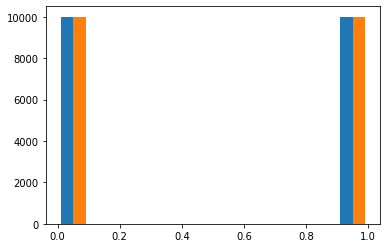

In [7]:
plt.hist(test_spheres.all_actual_distances.numpy())

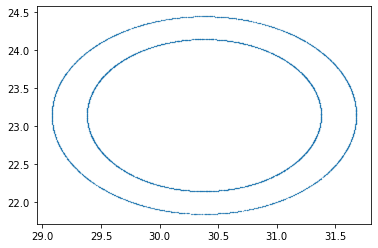

In [8]:
plt.scatter(test_spheres.on_mfld_pts_trivial_[:, 0] + test_spheres.translation[0], test_spheres.on_mfld_pts_trivial_[:, 1] + test_spheres.translation[1], s=0.01)

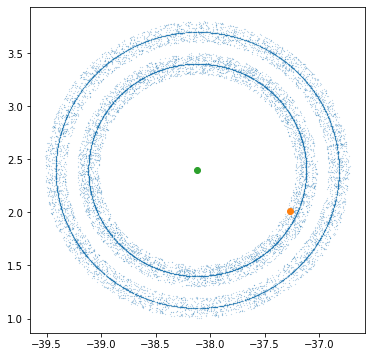

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(test_spheres.all_points_rot_[:, 0], test_spheres.all_points_rot_[:, 1], s=0.01)
plt.scatter(test_spheres.all_points_rot_[2, 0], test_spheres.all_points_rot_[2, 1])
plt.scatter(test_spheres.x_cn[0], test_spheres.x_cn[1])

x = test_spheres.poca[100]

# plt.scatter(test_spheres.poca[100, 0], test_spheres.poca[100, 1])
# plt.scatter(test_spheres.poca[0, 0], test_spheres.normed_all_points[0, 1], s=0.01)

In [10]:
test_spheres.poca_idx

array([1823, 1104, 1041, ..., 7234, 5541, 6402])

In [11]:
test_spheres.class_labels

tensor([2, 2, 2,  ..., 1, 1, 1])

In [12]:
np.linalg.norm(test_spheres.all_points_rot_[:100] - test_spheres.x_cn, axis=1) - 1.

array([-0.08645055,  0.07873482, -0.0643529 ,  0.05278908,  0.01365879,
        0.05110675, -0.02939139,  0.00534785, -0.01611545,  0.03843766,
        0.05646307,  0.08545586, -0.05553183, -0.01531309,  0.06538408,
        0.02341633,  0.01169843,  0.09232412,  0.03104151,  0.0261677 ,
        0.09078787, -0.07860583,  0.0546973 , -0.02369702, -0.09732623,
       -0.09954564, -0.07680704,  0.09550936, -0.0085196 , -0.02887254,
       -0.07738623, -0.02577843,  0.03613605, -0.04478032,  0.04095526,
       -0.08870255,  0.02158798, -0.05922652, -0.09867112, -0.03347594,
        0.07890563,  0.01400415,  0.03749251,  0.04216656,  0.02472713,
        0.07792246, -0.081037  , -0.00906109,  0.0689414 ,  0.02766937,
        0.0637609 ,  0.08043077, -0.01530558,  0.06319675,  0.01748159,
        0.00120692, -0.05000661, -0.03160113,  0.01817913,  0.02015485,
       -0.03403911,  0.09327325,  0.03708268, -0.05547464,  0.02425703,
       -0.05163713,  0.05398473,  0.06142772, -0.07916294,  0.07

In [13]:
test_spheres.class_labels

tensor([2, 2, 2,  ..., 1, 1, 1])

In [21]:
np.linalg.norm(test_spheres.normed_all_points[10000:15000] - test_spheres.fix_center, ord=2, axis=1) - 1.3




array([ 0.00622509, -0.04932855,  0.0222031 , ...,  0.08331398,
       -0.03657361,  0.03642726])

In [22]:
test_spheres.normed_all_actual_distances[10000:15000]

tensor([[1.0000, 0.0062],
        [1.0000, 0.0493],
        [1.0000, 0.0222],
        ...,
        [1.0000, 0.0833],
        [1.0000, 0.0366],
        [1.0000, 0.0364]])

In [36]:
np.where(test_spheres.normed_all_actual_distances[test_spheres.class_labels == 2][:, 0] > 0.1)[0].shape

(5000,)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(test_spheres.on_mfld_pts_trivial_[:, 0], test_spheres.on_mfld_pts_trivial_[:, 1], s=0.01)
idx = 2000
plt.scatter(test_spheres.poca[idx][0], test_spheres.poca[idx][1])
tan_dir_local = test_spheres.tang_dset[test_spheres.poca_idx[idx]][0]
norm_dir_local = test_spheres.norm_dset[test_spheres.poca_idx[idx]][0]

plt.arrow(test_spheres.poca[idx][0], test_spheres.poca[idx][1], tan_dir_local[0], tan_dir_local[1])
plt.arrow(test_spheres.poca[idx][0], test_spheres.poca[idx][1], norm_dir_local[0], norm_dir_local[1])

on_mfld_pt = test_spheres.poca[idx]
norm_dir = test_spheres.norm_dset[test_spheres.poca_idx[idx]]
rdm_coeffs = np.random.normal(0, 1, size=norm_dir.shape[0]).reshape(-1, 1)
norm_delta = np.sum(rdm_coeffs * norm_dir, axis=0)
off_mfld_pt = on_mfld_pt + norm_delta

plt.scatter(test_spheres.new_poca_dset[idx][0], test_spheres.new_poca_dset[idx][1])
# off_mfld_idx = idx if idx < test_spheres.S1.genattrs.num_neg else idx + (test_spheres.S1.genattrs.N - test_spheres.S1.genattrs.num_neg)
# plt.scatter(test_spheres.all_points[idx][0], test_spheres.all_points[idx][1])
plt.scatter(off_mfld_pt[0], off_mfld_pt[1])

In [ ]:
test_spheres.gamma, test_spheres.anchor, test_spheres.fix_center

In [ ]:
test_spheres.x_cn

In [ ]:
np.random.choice([1, 2, 3, 4, 5, 6], size=4)

In [ ]:
np.where(test_spheres == 2)[0].shape